# Sprint 7

# K-Nearest Neighbore (KNN) classification 

In [68]:
import pandas as pd
data=pd.read_csv("Football_data_merged_cleaned.csv")
data.head()

,Unnamed: 0,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,sub_position,position_x,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,game_lineups_id,number,player_name_y,team_captain
0,0,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,8d717b1017e72d89d2ee1112bb2d7466,22,Timothy Chandler,0
1,1,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,d53eb3fd74523d6dd4536653c145ae96,22,Timothy Chandler,0
2,2,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,3efc21c645e46b2f411bcdb1710aa444,22,Timothy Chandler,0
3,3,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,cc79e78c570ce19872dfed125d324407,22,Timothy Chandler,0
4,4,2231426_49723,2231426,49723,L1,0,0,0,0,70,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,21de58902f547e231bf2604be9fa996f,22,Timothy Chandler,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4199 non-null   int64  
 1   appearance_id                4199 non-null   object 
 2   game_id_x                    4199 non-null   int64  
 3   player_id                    4199 non-null   int64  
 4   competition_id_x             4199 non-null   object 
 5   yellow_cards                 4199 non-null   int64  
 6   red_cards                    4199 non-null   int64  
 7   goals                        4199 non-null   int64  
 8   assists                      4199 non-null   int64  
 9   minutes_played               4199 non-null   int64  
 10  season                       4199 non-null   int64  
 11  round                        4199 non-null   object 
 12  home_club_goals              4199 non-null   int64  
 13  away_club_goals   

In [70]:
data.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id_x', 'player_id',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_manager_name', 'away_club_manager_name',
       'stadium', 'attendance', 'referee', 'away_club_name', 'aggregate',
       'competition_type', 'game_event_id', 'date', 'minute', 'type_x', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur', 'game_lineups_id',
       'number', 'player_name_y', 'team_captain'],
      dtype='object')

### Business question
### Attendance and Stadium Analysis
1. Can attendance levels be classified based on player performance during matches?
2. Can attendance levels be classified based on match-related factors, including the stadium and team performance?
3. Can attendance levels be classified based on player demographics and financial data?

1. Can attendance levels be classified based on player performance during matches?
Classify: attendance into levels (e.g., Low, Medium, High, Very High)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [74]:
# Categorize attendance into levels
data['attendance_category'] = pd.cut(data['attendance'], 
                                     bins=[0, 20000, 40000, 60000, 80000, np.inf], 
                                     labels=['Low', 'Medium', 'High', 'Very High', 'Excellent'])

# Add a comment showing the total count of each attendance category
attendance_counts = data['attendance_category'].value_counts()
print("Total count of attendance categories:\n", attendance_counts)

# Define features (player performance metrics) and target (attendance category)
X = data[['goals', 'assists', 'yellow_cards']]
y = data['attendance_category']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict attendance categories on test data
y_pred = knn.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))


Total count of attendance categories:
 attendance_category
Low          1587
High          967
Medium        935
Excellent     388
Very High     322
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

   Excellent       0.20      0.01      0.02       108
        High       0.28      0.18      0.22       285
         Low       0.44      0.58      0.50       497
      Medium       0.29      0.45      0.35       269
   Very High       0.00      0.00      0.00       101

    accuracy                           0.37      1260
   macro avg       0.24      0.24      0.22      1260
weighted avg       0.31      0.37      0.32      1260



In [75]:
print(data['attendance_category'].head())

0    High
1    High
2    High
3    High
4    High
Name: attendance_category, dtype: category
Categories (5, object): ['Low' < 'Medium' < 'High' < 'Very High' < 'Excellent']


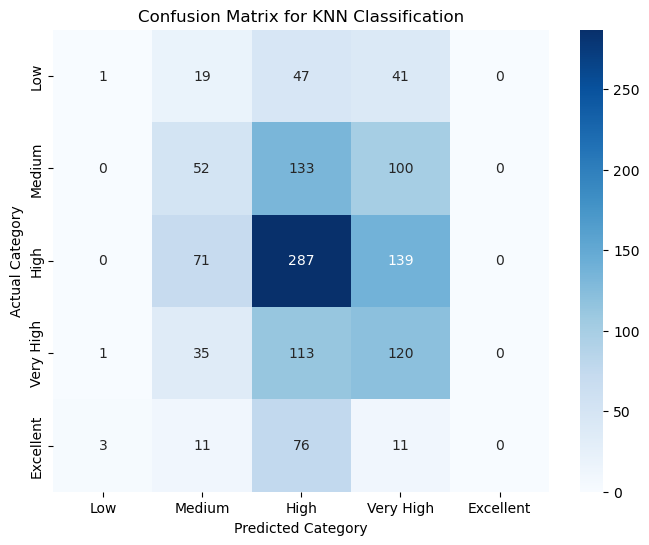

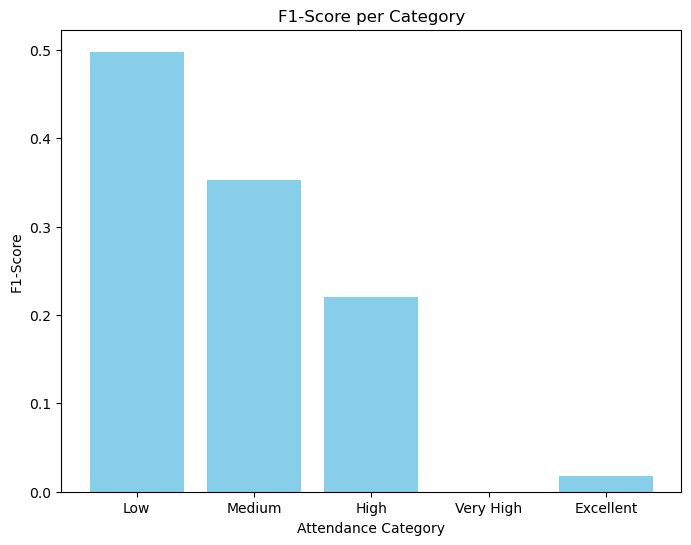

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High', 'Very High', 'Excellent'], 
            yticklabels=['Low', 'Medium', 'High', 'Very High', 'Excellent'])
plt.title('Confusion Matrix for KNN Classification')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()

# Plot the classification report as a bar chart
report = classification_report(y_test, y_pred, output_dict=True)
categories = ['Low', 'Medium', 'High', 'Very High', 'Excellent']
accuracy_per_category = [report[category]['f1-score'] for category in categories]

plt.figure(figsize=(8, 6))
plt.bar(categories, accuracy_per_category, color='skyblue')
plt.title('F1-Score per Category')
plt.xlabel('Attendance Category')
plt.ylabel('F1-Score')
plt.show()


### Interpretation:
The classification report and confusion matrix provide insights into the model's overall performance, including the accuracy of each category prediction.                 
The F1-score bar plot allows you to visually compare the performance of the model for different attendance levels, identifying areas where improvements might be needed.

2.Can attendance levels be classified based on match-related features like home_club_goals,       away_club_goals, and stadium? 
classify: Predict attendance categories based on match-specific features.

In [79]:
# Categorize attendance into levels
data['attendance_category'] = pd.cut(data['attendance'], 
                                     bins=[0, 20000, 40000, 60000, 80000, np.inf], 
                                     labels=['Low', 'Medium', 'High', 'Very High', 'Excellent'])

# Encode categorical data (e.g., stadium)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['stadium_encoded'] = le.fit_transform(data['stadium'])

# Define features (match-related metrics) and target
X = data[['home_club_goals', 'away_club_goals', 'stadium_encoded']]
y = data['attendance_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict attendance categories on test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

   Excellent       0.99      0.83      0.90       108
        High       0.89      0.85      0.87       285
         Low       0.94      0.96      0.95       497
      Medium       0.92      0.95      0.94       269
   Very High       0.82      0.92      0.87       101

    accuracy                           0.92      1260
   macro avg       0.91      0.90      0.90      1260
weighted avg       0.92      0.92      0.92      1260



# Sprint 8

### Referee Analysis
1. Yellow and Red Cards Distribution per Referee.


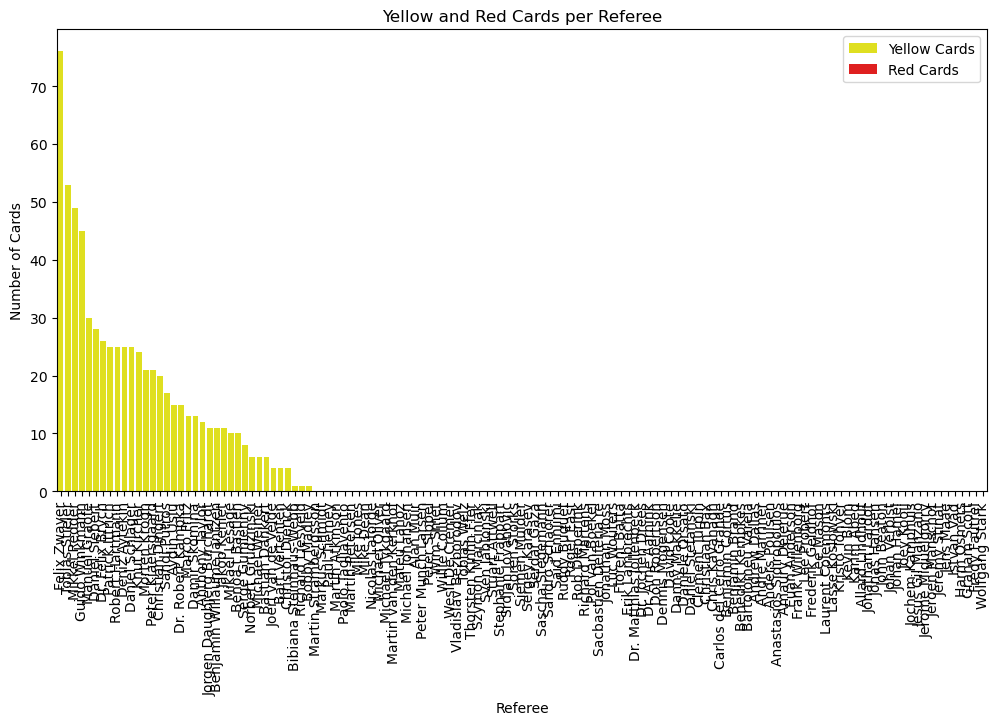

In [82]:
# Group data by referee and sum yellow and red cards
referee_cards = data.groupby('referee')[['yellow_cards', 'red_cards']].sum().reset_index()

# Sort by total yellow cards (optional)
referee_cards = referee_cards.sort_values(by='yellow_cards', ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=referee_cards, x='referee', y='yellow_cards', color='yellow', label='Yellow Cards')
sns.barplot(data=referee_cards, x='referee', y='red_cards', color='red', label='Red Cards')
plt.xticks(rotation=90)
plt.xlabel('Referee')
plt.ylabel('Number of Cards')
plt.title('Yellow and Red Cards per Referee')
plt.legend()
plt.show()


### Substitution Patterns
2. Average Substitutions per Match

Average substitutions per match: 11.66388888888889


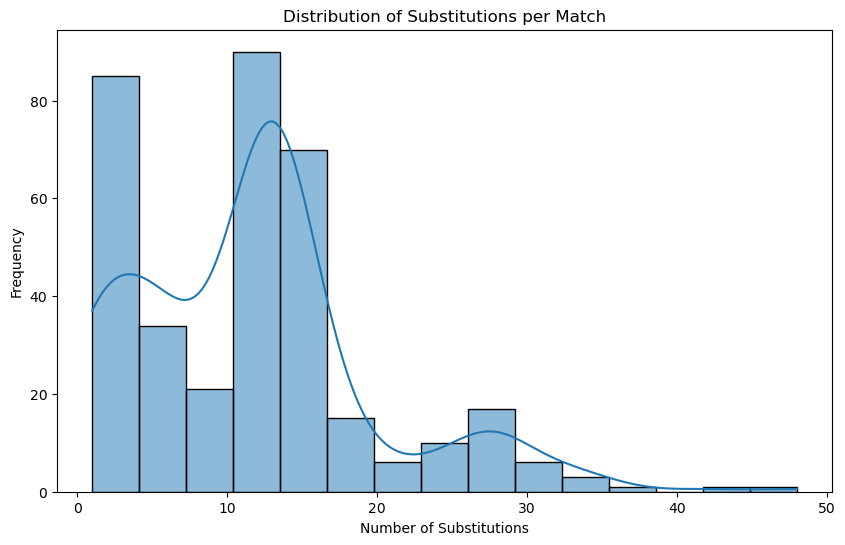

In [84]:
# Assuming 'sub_position' column represents a substitution event
substitution_data = data[data['sub_position'].notna()]

# Group by game_id and count the number of substitutions (sub_position is not null)
substitutions_per_game = substitution_data.groupby('game_id_x').size().reset_index(name='substitutions')

# Calculate average substitutions per match
average_substitutions = substitutions_per_game['substitutions'].mean()
print(f"Average substitutions per match: {average_substitutions}")

# Plot distribution of substitutions per match
plt.figure(figsize=(10, 6))
sns.histplot(substitutions_per_game['substitutions'], kde=True, bins=15)
plt.title('Distribution of Substitutions per Match')
plt.xlabel('Number of Substitutions')
plt.ylabel('Frequency')
plt.show()


### Event Analysis
3. Goals Scored Throughout the Match (First Half vs. Second Half)


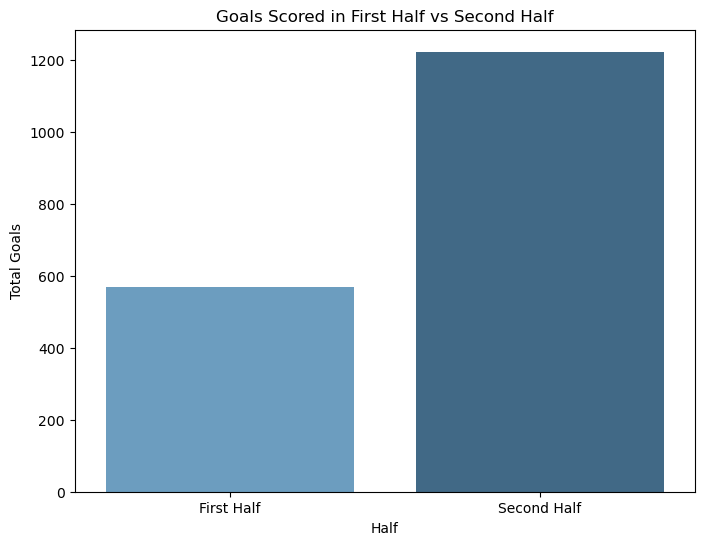

In [86]:
# Create a new column 'half' to categorize the minute into First Half and Second Half
data['half'] = data['minute'].apply(lambda x: 'First Half' if x <= 45 else 'Second Half')

# Group by half and sum the goals
goals_by_half = data.groupby('half')['goals'].sum().reset_index()

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=goals_by_half, x='half', y='goals', palette="Blues_d")
plt.title('Goals Scored in First Half vs Second Half')
plt.xlabel('Half')
plt.ylabel('Total Goals')
plt.show()

# Sprint 9

### 2. Competition Analysis: Descriptive Analysis
Business Question:

1. Which team has the highest average attendance?
2. What is the average ticket price by team?

In [89]:
import pandas as pd
from scipy.stats import ttest_ind


In [90]:
# Question 1: Which team has the highest average attendance?
# Highest average attendance by home and away teams
home_avg_attendance = data.groupby('home_club_manager_name')['attendance'].mean().sort_values(ascending=False)
away_avg_attendance = data.groupby('away_club_name')['attendance'].mean().sort_values(ascending=False)

print("Home Teams with the Highest Average Attendance:")
print(home_avg_attendance)

print("\nAway Teams with the Highest Average Attendance:")
print(away_avg_attendance)


Home Teams with the Highest Average Attendance:
home_club_manager_name
Zinedine Zidane         76894.000000
Peter Stoger            76861.307190
Peter Bosz              75971.041017
Jupp Heynckes           75000.000000
Carlo Ancelotti         73500.000000
                            ...     
Allan Kuhn               1478.266667
Thomas Thomasberg        1348.333333
Christian Lanstrup       1119.000000
Morten Karlsen           1011.000000
Torsten Lieberknecht      300.000000
Name: attendance, Length: 154, dtype: float64

Away Teams with the Highest Average Attendance:
away_club_name
FC Ingolstadt 04                              81360.000000
Verein Fur Bewegungsspiele Stuttgart 1893     79970.689655
Fortuna Dusseldorf                            73833.437477
Hamburger SV                                  71395.662921
1. FC Union Berlin                            70692.933333
                                                  ...     
Sonderjyske Fc                                 1997.704545

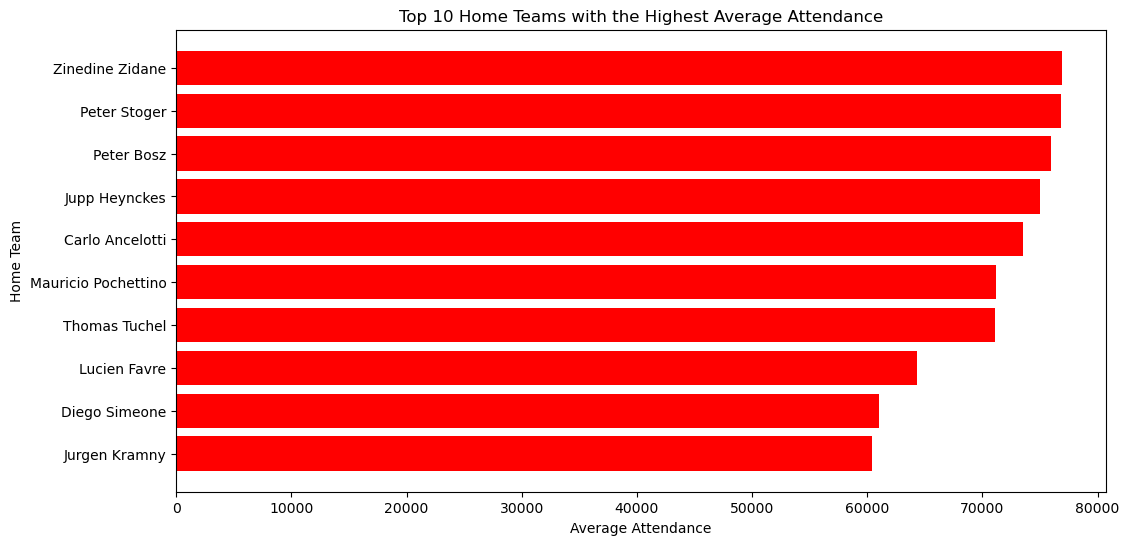

In [91]:
import matplotlib.pyplot as plt

# Visualization for Home Teams with the Highest Average Attendance
home_avg_attendance = data.groupby('home_club_manager_name')['attendance'].mean().sort_values(ascending=False)
away_avg_attendance = data.groupby('away_club_name')['attendance'].mean().sort_values(ascending=False)

# Top 10 Home Teams
top_home_teams = home_avg_attendance.head(10)
top_away_teams = away_avg_attendance.head(10)

# Plot for Home Teams
plt.figure(figsize=(12, 6))
plt.barh(top_home_teams.index, top_home_teams.values, color='red')
plt.xlabel('Average Attendance')
plt.ylabel('Home Team')
plt.title('Top 10 Home Teams with the Highest Average Attendance')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


#### Interpretation:                               
Teams with the highest average attendance represent market leaders. Analyze their fan engagement strategies.

In [93]:
# Average market value by team
home_avg_value = data.groupby('home_club_manager_name')['market_value_in_eur'].mean().sort_values(ascending=False)
away_avg_value = data.groupby('away_club_name')['market_value_in_eur'].mean().sort_values(ascending=False)

print("Average Market Value (Home Teams):")
print(home_avg_value)

print("\nAverage Market Value (Away Teams):")
print(away_avg_value)


Average Market Value (Home Teams):
home_club_manager_name
Jupp Heynckes       25000000.0
Sean Dyche          25000000.0
Daniel Farke        25000000.0
Chris Wilder        25000000.0
Roger Schmidt       25000000.0
                       ...    
Nicky Hayen           300000.0
Hernan Losada         300000.0
Philippe Clement      300000.0
Stale Solbakken       300000.0
Zoran Mirkovic        300000.0
Name: market_value_in_eur, Length: 154, dtype: float64

Average Market Value (Away Teams):
away_club_name
Leicester City                       25000000.0
Sport Lisboa e Benfica               25000000.0
Chelsea Football Club                25000000.0
Atalanta Bergamasca Calcio S.p.a.    25000000.0
Aston Villa Football Club            25000000.0
                                        ...    
SK Beveren                             400000.0
Oud-Heverlee Leuven                    300000.0
AC Horsens                             300000.0
Royal Standard de Liege                300000.0
Aalborg BK     

#### Interpretation:
Comparing ticket prices across teams reveals pricing strategies and areas for adjustment.

# Sprint 10

## K-means clustering

### Player Attributes and Demographics Analysis
#### Business Question
1. Can we group players into clusters based on their market value and goals scored?     


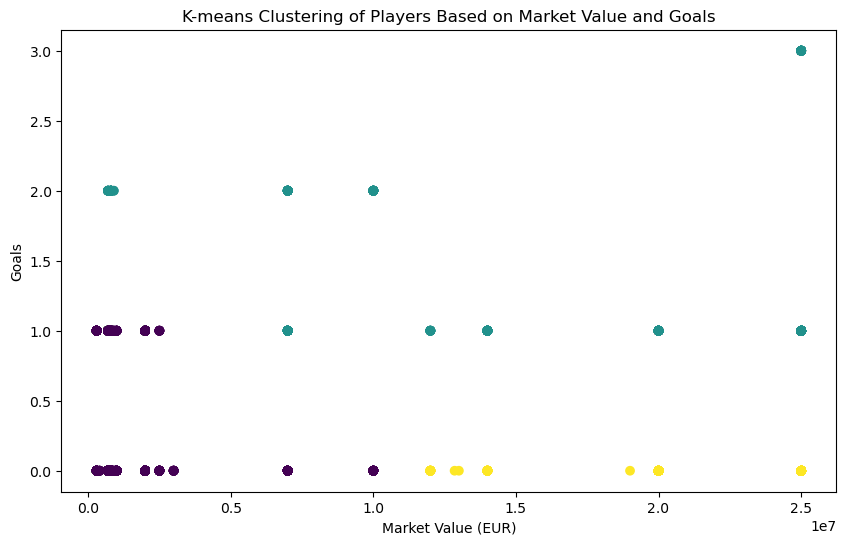

In [98]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features (market value and goals)
features = data[['market_value_in_eur', 'goals']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(data['market_value_in_eur'], data['goals'], c=data['cluster'], cmap='viridis')
plt.title('K-means Clustering of Players Based on Market Value and Goals')
plt.xlabel('Market Value (EUR)')
plt.ylabel('Goals')
plt.show()


### Interpretation:
The K-means clustering algorithm groups players based on their market value and goals scored. Players with similar characteristics are assigned to the same cluster.
The scatter plot helps visualize the groups, which can identify high-performing players who may be undervalued or overvalued.

### 2. Contract Management Analysis
1. Average attendance per season for home games (Descriptive Analysis)

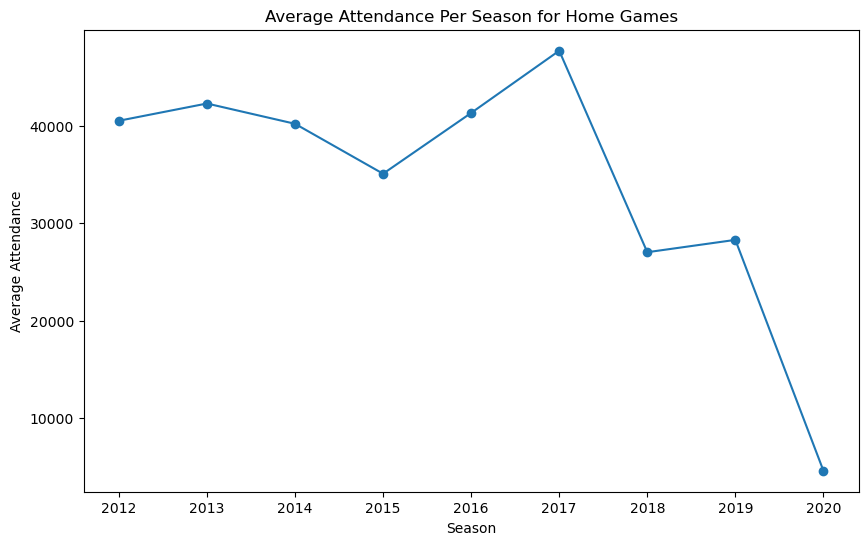

In [101]:
# Group by season and calculate average attendance for home games
home_games = data[data['home_club_goals'].notnull()]
average_attendance = home_games.groupby('season')['attendance'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(10,6))
plt.plot(average_attendance['season'], average_attendance['attendance'], marker='o')
plt.title('Average Attendance Per Season for Home Games')
plt.xlabel('Season')
plt.ylabel('Average Attendance')
plt.show()


### Interpretation:
This code calculates the average attendance for home games grouped by season. The line graph illustrates how attendance varies across different seasons.
It provides insight into how the team's performance, player popularity, or stadium changes affect the fan attendance at home games.

2. Distribution of red and yellow cards across different competitions

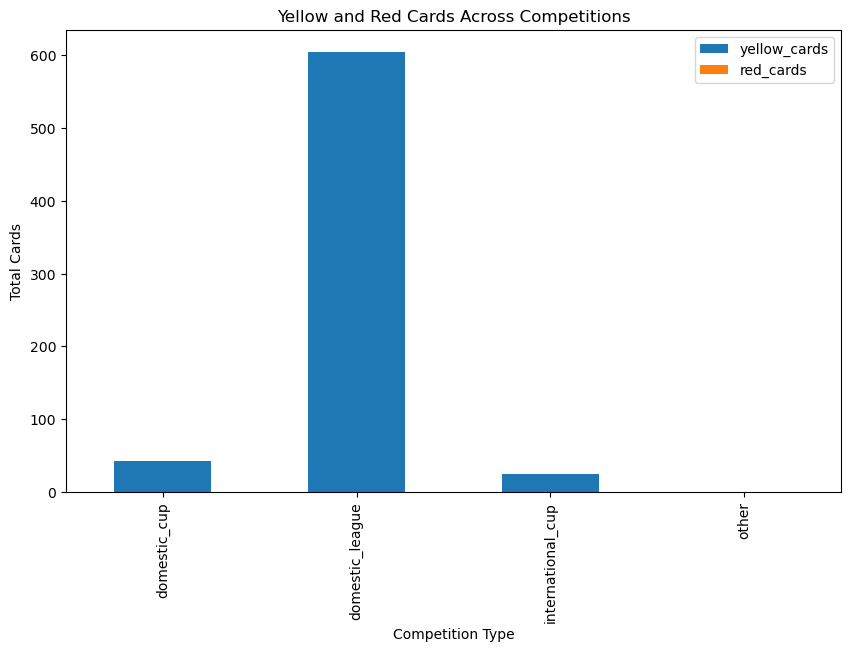

In [104]:
# Group by competition type and calculate total yellow and red cards
cards_by_competition = data.groupby('competition_type')[['yellow_cards', 'red_cards']].sum().reset_index()

# Visualize the results using a stacked bar chart
cards_by_competition.set_index('competition_type')[['yellow_cards', 'red_cards']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Yellow and Red Cards Across Competitions')
plt.xlabel('Competition Type')
plt.ylabel('Total Cards')
plt.show()


### Interpretation:
This analysis aggregates yellow and red cards by competition type and visualizes them using a stacked bar chart.
It allows us to compare the discipline levels across different competitions and may indicate which competitions see more aggressive play.